<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-with-pytorch-step-by-step/02_simple_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Regression Problem

In this notebook, I will stick with a simple and familiar problem:
a linear regression with a single feature x! It doesn’t get much simpler than that…

$$ y = b + wx + ϵ$$

It is also possible to think of it as the simplest neural network possible: one input,
one output, and no activation function (that is, linear).

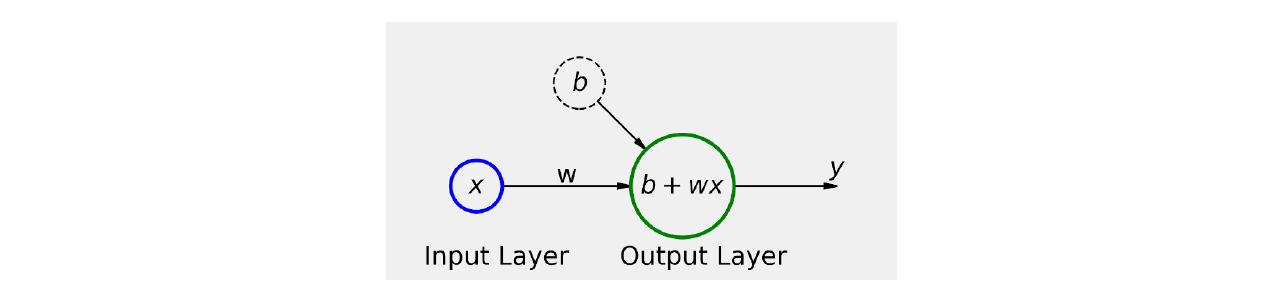

##Setup

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter1()
# This is needed to render the plots in this chapter
from plots.chapter1 import *

Installing torchviz...
Creating folders...
Finished!


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

##Data Generation

Let’s start generating some synthetic data: we start with a vector of `100 (N)` points
for our feature `(x)` and create our labels `(y)` using `b = 1, w = 2`, and some Gaussian noise (epsilon).

In [3]:
np.random.seed(42)

true_b = 1
true_w = 2
N = 100

# Data Generation
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.rand(N, 1))
y = true_b + true_w * x + epsilon

Next, let’s split our synthetic data into train and validation sets, shuffling the array
of indexes and using the first 80 shuffled points for training.

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N * .8)]
# Uses the remaining indices for validation
val_idx = idx[int(N * .8): ]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6e3082ed0>,
       dtype=object))

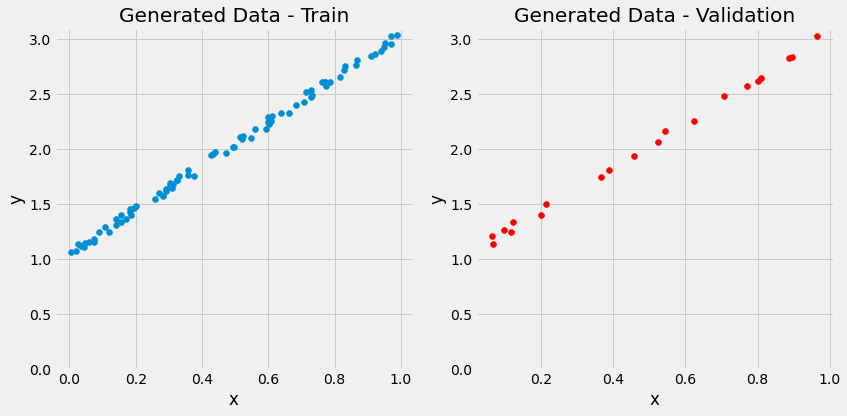

In [5]:
figure1(x_train, y_train, x_val, y_val)

We know that b = 1, w = 2, but now let’s see how close we can get to the true
values by using gradient descent and the 80 points in the training set.

##Gradient Descent

I’ll cover the five basic steps you’d need to go through to use gradient descent.

###Step 0: Random Initialization

For training a model, you need to randomly initialize the parameters/weights.

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


###Step 1: Compute Model's Predictions

This is the forward pass - it simply computes the model’s predictions using the current
values of the parameters/weights.

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

###Step 2: Compute the Loss

For a regression problem, the loss is given by the Mean Squared Error (MSE), that
is, the average of all squared errors, that is, the average of all squared differences
between labels (`y`) and predictions (`b + wx`).

Here, we are using all data points of the training set to compute the
loss, so `n = N = 80`, meaning we are performing batch gradient descent.

In [8]:
# Step 2 - Computing the loss

# We are using ALL data points, so this is BATCH gradient descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.808129216295391


###Step 3: Compute the Gradients

A gradient is a partial derivative — why partial? Because one computes it with
respect to (w.r.t.) a single parameter. We have two parameters, b and w, so we must compute two partial derivatives.

A derivative tells you how much a given quantity changes when you slightly vary
some other quantity. In our case, how much does our MSE loss change when we
vary each one of our two parameters separately?

> **Gradient** = how much the loss changes if ONE parameter
changes a little bit!

In [10]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.108262701823821 -1.8206663430690853


###Step 4 - Update the Parameters

In the final step, we use the gradients to update the parameters. 

Since we are
trying to minimize our losses, we reverse the sign of the gradient for the update.

In our example, let’s start with a value of 0.1 for the learning rate.

In [11]:
# Sets learning rate
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80754042] [0.04380233]


###Step 5 - Rinse and Repeat!

Now we use the updated parameters to go back to Step 1 and restart the process.

Repeating this process over and over for many epochs is, in a nutshell, training a
model.

##Linear Regression in Numpy